## Ejercicio 1: Funciones no convenxas y múltiples mínimos.

Tenemos una función no convenza que tiene varios mínimos locales, la cuál es:

Esta función representa algo parecido a lo que pasa al entrenar redes neuronales: a veces el descenso de gradiente se queda atrapado en un mínimo que no es el mejor.

El objetivo es explorar cómo distintos algoritmos de optimización se comportan al minimizar esta función. Los algoritmos de optimización a implementar son: 
SGD clásico, SGD con momentum, AdaGrad, RMSProp y Adam.

In [5]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

In [263]:
#Función objetivo
def f(x, y):
    return 0.02*(x**2 + y**2) - np.exp(-(((x+2)**2)/(0.2**2) + ((y-1)**2)/(3**2))) \
           - 0.9*np.exp(-(((x-1)**2)/(3**2) + ((y+1)**2)/(0.3**2))) \
           - 0.7*np.exp(-(((x-2)**2)/(0.5**2) + ((y-2)**2)/(2**2)))

# Gradiente
def grad_f(x, y):
    df_dx = 0.04*x + ((2*(x+2))/(0.2**2))*np.exp(-(((x+2)**2)/(0.2**2) + ((y-1)**2)/(3**2))) \
         + 0.9*(2*(x-1)/3**2)*np.exp(-(((x-1)**2)/(3**2) + ((y+1)**2)/(0.3**2))) \
         + 0.7*(2*(x-2)/0.5**2)*np.exp(-(((x-2)**2)/(0.5**2) + ((y-2)**2)/(2**2)))
    
    df_dy = 0.04*y + (2*(y-1)/3**2)*np.exp(-(((x+2)**2)/(0.2**2) + ((y-1)**2)/(3**2))) \
         + 0.9*(2*(y+1)/0.3**2)*np.exp(-(((x-1)**2)/(3**2) + ((y+1)**2)/(0.3**2))) \
         + 0.7*(2*(y-2)/2**2)*np.exp(-(((x-2)**2)/(0.5**2) + ((y-2)**2)/(2**2)))
    
    return np.array([df_dx, df_dy])

- **SGD Clásico**

In [268]:
def sgd(initial_params, learning_rate=0.01, n_iterations=500):
    x = np.array(initial_params, dtype=float)
    trajectory = [x.copy()]
    loss_history = [f(*x)]

    
    for _ in range(n_iterations):
        g = grad_f(*x)
        x -= learning_rate * g
        trajectory.append(x.copy())
        loss_history.append(f(*x))
    
    return np.array(trajectory), loss_history

- **SGD con Momentum**

In [269]:
def sgd_momentum(initial_params, learning_rate=0.01, momentum=0.9, n_iterations=500):
    x = np.array(initial_params, dtype=float)
    v = np.zeros_like(x)
    trajectory = [x.copy()]
    loss_history = [f(*x)]
    
    for _ in range(n_iterations):
        g = grad_f(*x)
        v = momentum * v - learning_rate * g
        x += v
        trajectory.append(x.copy())
        loss_history.append(f(*x))
    
    return np.array(trajectory), loss_history 

### Trayectorias de optimización sobre el contorno de la funcion

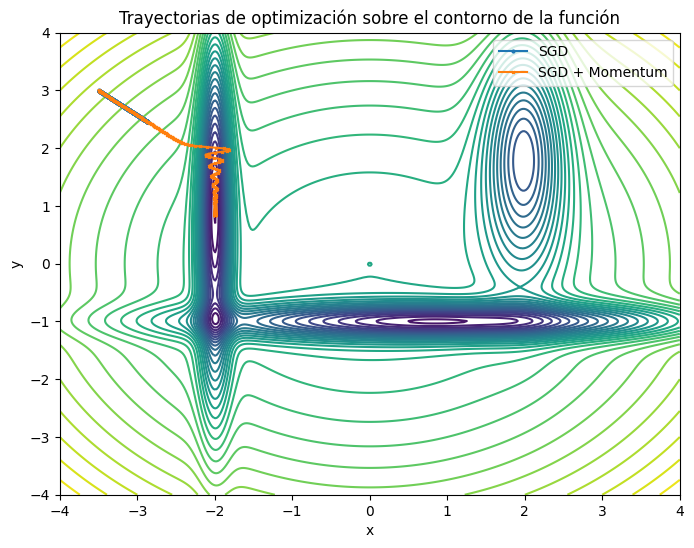

In [270]:
# Graficas contorno y trayectorias
x_vals = np.linspace(-4, 4, 400)
y_vals = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=30)

# Trayectorias desde el mismo punto
init = np.array([-3.5, 3])
traj_sgd, loss_sgd = sgd(init)
traj_momentum, loss_momentum = sgd_momentum(init)

plt.plot(traj_sgd[:, 0], traj_sgd[:, 1], marker='o', markersize=2, label='SGD')
plt.plot(traj_momentum[:, 0], traj_momentum[:, 1], marker='x', markersize=2, label='SGD + Momentum')

plt.legend()
plt.title("Trayectorias de optimización sobre el contorno de la función")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
#Evolución de la función de pérdida

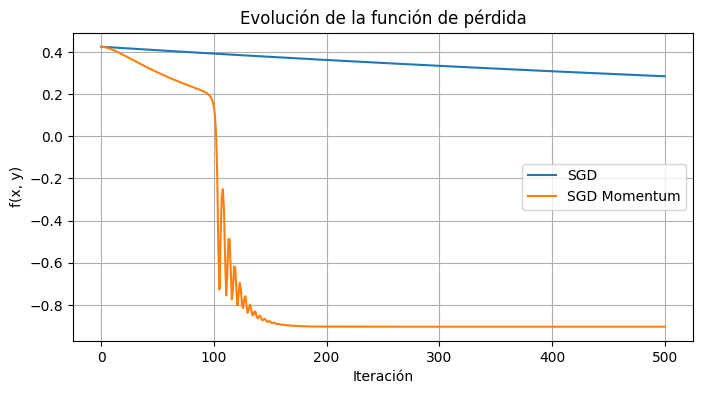

In [271]:
plt.figure(figsize=(8, 4))
plt.plot(loss_sgd, label='SGD')
plt.plot(loss_momentum, label='SGD Momentum')
plt.xlabel("Iteración")
plt.ylabel("f(x, y)")
plt.title("Evolución de la función de pérdida")
plt.legend()
plt.grid(True)
plt.show()

Notemos que: con las dos gráficas anteriores podemos notar que con SGD clásico desciende lentamente, se queda estancado. Co SGD con Momentum desciende más rápido, luego oscila un poco antes de estabilizarse. 

- **Análisis de resultados**

Evaluamos la funcion en algunos puntos que pueden ser mínimos locales o global.

In [272]:
puntos_minimos = [
    (-2, 1),  
    (1, -1),  
    (2, 2),  
    (0, 0),    # Centro
    (1.5, -1.2) 
]

print("Evaluación de la función en posibles mínimos:")
for p in puntos_minimos:
    val = f(p[0], p[1])
    print(f"f({p[0]}, {p[1]}) = {val:.4f}")


Evaluación de la función en posibles mínimos:
f(-2, 1) = -0.9000
f(1, -1) = -0.8614
f(2, 2) = -0.5400
f(0, 0) = -0.0000
f(1.5, -1.2) = -0.5074


El mínimo global puede ser aproximadamente -0.9

Vamos a buscar el último punto alcanzado por cada algoritmo, es decir, el punto donde se detienen tras todas las iteraciones para revisar si puede ser un mínimo global.

In [273]:
#Con SGD 
def sgd(initial_params, learning_rate=0.01, n_iterations=500):
    x = np.array(initial_params, dtype=float)
    for _ in range(n_iterations):
        grad = grad_f(*x)
        x -= learning_rate * grad
    return x
#Con SGD Momentum
def sgd_momentum(initial_params, learning_rate=0.01, momentum=0.9, n_iterations=500):
    x = np.array(initial_params, dtype=float)
    v = np.zeros_like(x)
    for _ in range(n_iterations):
        grad = grad_f(*x)
        v = momentum * v - learning_rate * grad
        x += v
    return x

In [275]:
initial_point = [-3.5, 3]

final_sgd = sgd(initial_point)
final_momentum = sgd_momentum(initial_point)

print(f"Último punto alcanzado por SGD clásico: {final_sgd}")
print(f"Último punto alcanzado por SGD con momentum: {final_momentum}")

Último punto alcanzado por SGD clásico: [-2.86544294  2.45609399]
Último punto alcanzado por SGD con momentum: [-1.99839702  0.84711331]


Evaluamos la funcion en los puntos encontrados

In [276]:
val_sgd = f(*final_sgd)
val_momentum = f(*final_momentum)

print(f"Valor de f(x, y) en el punto final de SGD clásico: {val_sgd:.6f}")
print(f"Valor de f(x, y) en el punto final de SGD con momentum: {val_momentum:.6f}")

Valor de f(x, y) en el punto final de SGD clásico: 0.284863
Valor de f(x, y) en el punto final de SGD con momentum: -0.903118


Vemos que con SGD Momentum si encontró el mínimo global.

**Resumen del análisis comparativo**.
    
A partir de las gráficas observadas para SGD clásico y SGD con Momentum, se puede concluir lo soguiente:
- Ninguno de los dos métodos converge siempre al mismo punto. Dependiendo del punto inicial, pueden quedarse atrapados en diferentes mínimos locales.
- Con SGD clásico avanza lentamente, especialmente en zonas planas de la función. En muchos casos, ni siquiera logra escapar de regiones altas, quedándose atrapado antes de alcanzar un mínimo profundo por lo que concluimos que es poco eficiente en escenarios no convexos.
- SGD con Momentum logra avanzar más rápidamente y oscila alrededor del mínimo antes de estabilizarse.

## Ejercicio 2: Escenarios con colas pesadas.
En esta parte el objetivo es evaluar cómo afectan las distribuciones con colas pesadas al rendimiento de los algoritmos de optimización.


In [356]:
# --- 1. Generate Heavy-Tailed Data ---
np.random.seed(123)
N_data = 10000
X = 5 * (1 + np.random.pareto(a=1.5, size=N_data))
Y = X + np.random.normal(loc=0, scale=16, size=N_data)

inicio_reg = np.random.uniform(-2,2, size = 1)
X_b = X.T.reshape(-1, 1) # Add bias term (column of 1s)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_b)

In [357]:
def mse_loss(X_b, Y, Theta):
    """Mean Squared Error loss for linear regression."""
    M = len(Y)
    predictions = X_b.dot(Theta)
    return np.sum((predictions - Y)**2) / (2 * M)

def mse_grad(X_b, Y, Theta):
    """Gradient of the MSE loss."""
    M = len(Y)
    predictions = X_b.dot(Theta)
    # Gradient = (1/M) * X_b.T * (predictions - Y)
    return X_b.T.dot(predictions - Y) / M


- **SGD**

In [358]:
def sgd_squared_loss_val(X, Y, batch_size, learning_rate, num_iterations, beta_initial):
    n_samples = X.shape[0]
    beta = beta_initial.copy()
    loss_history = []
    gradientes = []
    betas = []

    for _ in range(num_iterations):
        batch_indices = np.random.choice(range(n_samples), batch_size, replace=False)
        X_batch = X[batch_indices]
        Y_batch = Y[batch_indices]
        gradient = (2 / batch_size) * X_batch.T @ (X_batch @ beta - Y_batch)
        gradientes.append(gradient.copy())
        beta -= learning_rate * gradient
        loss = np.sum((X @ beta - Y) ** 2)/n_samples
        loss_history.append(loss)
        betas.append(beta.copy())

    return loss_history, betas, gradientes

In [374]:
loss_history_sgd_val, betas_sgd_val, gradientes_sgd = sgd_squared_loss_val(X_scaled, Y, 128, 0.001, 1500, np.array([0.0]))

<module 'matplotlib.pyplot' from 'C:\\Users\\ossoe\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

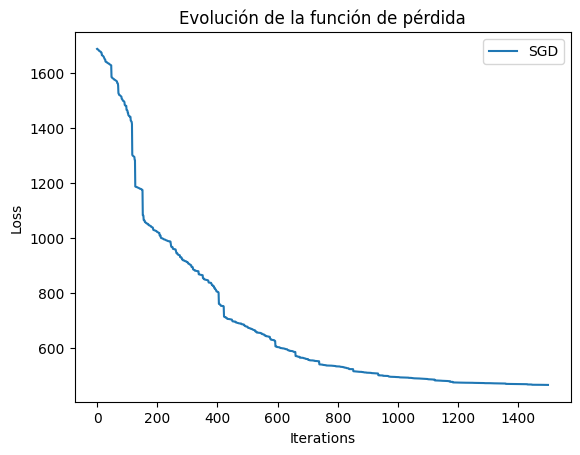

In [375]:
plt.plot(loss_history_sgd_val, label='SGD')
plt.legend()
plt.title("Evolución de la función de pérdida")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt

- **SGD con Momentum**

In [376]:
def sgd_momentum_squared_loss_val(X, Y, batch_size, learning_rate, alpha, num_iterations, beta_initial):
    n_samples = X.shape[0]
    beta = beta_initial.copy()
    loss_history = []
    gradientes = []
    betas = []
    v = np.zeros_like(beta)
    for _ in range(num_iterations):
        batch_indices = np.random.choice(range(n_samples), batch_size, replace=False)
        X_batch = X[batch_indices]
        Y_batch = Y[batch_indices]
        gradient = (2 / batch_size) * X_batch.T @ (X_batch @ beta - Y_batch)
        gradientes.append(gradient.copy())
        v=alpha*v-learning_rate*gradient
        beta = beta + v
        loss = np.sum((X @ beta - Y) ** 2)/n_samples
        loss_history.append(loss)
        betas.append(beta.copy())

    return beta, loss_history, betas, gradientes

In [377]:
beta_sgd_momentum_val, loss_history_sgd_momentum_val, betas_sgd_momentum_val, gradientes_sgd_momentum_val = sgd_momentum_squared_loss_val(X_scaled, Y, 256, 0.001, 0.9, 1000, np.array([0.0]))

Text(0, 0.5, 'Loss')

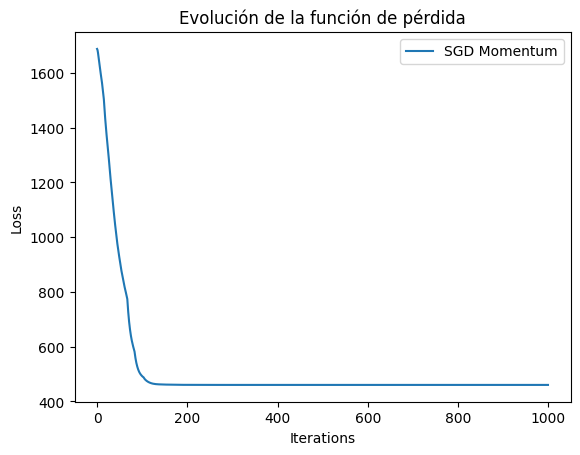

In [378]:
plt.plot(loss_history_sgd_momentum_val, label='SGD Momentum')
plt.legend()
plt.title("Evolución de la función de pérdida")
plt.xlabel('Iterations')
plt.ylabel('Loss')

### Conclusiones de esta parte:

Con respecto a la estabilidad
- Con SGD en las primeras 1000 iteraciones, la pérdida disminuye de forma abrupta, pasando de valores cercanos a 1600 hasta estabilizarse cerca de 400 y oscila antes de estabilizarse. Lo que indica que el algoritmo necesita más iteraciones para estabilizarse.
- SGD con momentum muestra una convergencia mucho más rápida que el SGD clásico. En las primeras aprox ~100 iteraciones, pasando de valores cercanos a 1600 hasta estabilizarse cerca de 400. No se observan oscilaciones.

Los resultados sugieren que, de estos dos métodos, SGD con momentum posee mayor robustez frente a colas pesadas.